In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset.zip to dataset.zip
User uploaded file "dataset.zip" with length 570692946 bytes


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('dataset.zip', 'r')
zip_ref.extractall()
zip_ref.close()

FileNotFoundError: ignored

In [3]:
import os
os.environ['QT_QPA_PLATFORM']='offscreen'

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

from keras import backend as K
K.set_image_dim_ordering('th')

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.activations import relu, sigmoid

from keras.layers.normalization import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [0]:
training_data = 'dataset/training'
validation_data = 'dataset/validation'
batch_size = 64
img_size = 80 # width and height
epochs = 75

In [1]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (3, img_size, img_size)))
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer= adam, metrics=['accuracy'])

model.summary()

NameError: ignored

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, width_shift_range=0.2, shear_range=0.4, 
                                   rotation_range=40, height_shift_range=0.2, zoom_range=0.2, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_batches = train_datagen.flow_from_directory(training_data, target_size=(img_size,img_size), class_mode='binary', batch_size = batch_size)
validation_batches = test_datagen.flow_from_directory(validation_data, target_size=(img_size, img_size), class_mode='binary', batch_size = batch_size)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [0]:
# saves the best weights with the most minimal loss
# checkpoint
from keras.callbacks import ModelCheckpoint
filepath="vgg_weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

trained_model=model.fit_generator(
        train_batches,
        steps_per_epoch=20000 // batch_size,
        epochs=75,
        validation_data=validation_batches,
        validation_steps=5000 // batch_size,
        callbacks=callbacks_list)

Epoch 1/75
312/312 [==============================] - 121s 387ms/step - loss: 0.7462 - acc: 0.5653 - val_loss: 0.6822 - val_acc: 0.5625

Epoch 00001: val_loss improved from inf to 0.68220, saving model to vgg_weights_best.hdf5
Epoch 2/75
223/312 [====================>.........] - ETA: 29s - loss: 0.6752 - acc: 0.6049

312/312 [==============================] - 118s 379ms/step - loss: 0.6691 - acc: 0.6104 - val_loss: 0.6689 - val_acc: 0.6006

Epoch 00002: val_loss improved from 0.68220 to 0.66894, saving model to vgg_weights_best.hdf5
Epoch 3/75
297/312 [===========================>..] - ETA: 4s - loss: 0.6241 - acc: 0.6577

312/312 [==============================] - 118s 377ms/step - loss: 0.6220 - acc: 0.6592 - val_loss: 0.5475 - val_acc: 0.7224

Epoch 00003: val_loss improved from 0.66894 to 0.54754, saving model to vgg_weights_best.hdf5
Epoch 4/75
312/312 [==============================] - 117s 375ms/step - loss: 0.5789 - acc: 0.6984 - val_loss: 0.5047 - val_acc: 0.7612

Epoch 00004: val_loss improved from 0.54754 to 0.50469, saving model to vgg_weights_best.hdf5
Epoch 5/75
  1/312 [..............................] - ETA: 37s - loss: 0.5809 - acc: 0.7188

312/312 [==============================] - 116s 373ms/step - loss: 0.5411 - acc: 0.7283 - val_loss: 0.6175 - val_acc: 0.6937

Epoch 00005: val_loss did not improve from 0.50469
Epoch 6/75
279/312 [=========================>....] - ETA: 10s - loss: 0.5051 - acc: 0.7553

312/312 [==============================] - 116s 372ms/step - loss: 0.5040 - acc: 0.7549 - val_loss: 0.4794 - val_acc: 0.7638

Epoch 00006: val_loss improved from 0.50469 to 0.47940, saving model to vgg_weights_best.hdf5
Epoch 7/75
311/312 [============================>.] - ETA: 0s - loss: 0.4646 - acc: 0.7833

312/312 [==============================] - 116s 372ms/step - loss: 0.4650 - acc: 0.7831 - val_loss: 0.4406 - val_acc: 0.7977

Epoch 00007: val_loss improved from 0.47940 to 0.44062, saving model to vgg_weights_best.hdf5
Epoch 8/75
254/312 [=======================>......] - ETA: 18s - loss: 0.4391 - acc: 0.7972

312/312 [==============================] - 116s 371ms/step - loss: 0.4371 - acc: 0.7982 - val_loss: 0.3881 - val_acc: 0.8253

Epoch 00008: val_loss improved from 0.44062 to 0.38808, saving model to vgg_weights_best.hdf5
Epoch 9/75
305/312 [============================>.] - ETA: 2s - loss: 0.4165 - acc: 0.8109

312/312 [==============================] - 115s 370ms/step - loss: 0.4159 - acc: 0.8112 - val_loss: 0.3265 - val_acc: 0.8574

Epoch 00009: val_loss improved from 0.38808 to 0.32654, saving model to vgg_weights_best.hdf5
Epoch 10/75
312/312 [==============================] - 115s 369ms/step - loss: 0.3900 - acc: 0.8257 - val_loss: 0.3117 - val_acc: 0.8674

Epoch 00010: val_loss improved from 0.32654 to 0.31167, saving model to vgg_weights_best.hdf5
Epoch 11/75
  2/312 [..............................] - ETA: 37s - loss: 0.4298 - acc: 0.7969

312/312 [==============================] - 115s 368ms/step - loss: 0.3691 - acc: 0.8345 - val_loss: 0.3099 - val_acc: 0.8656

Epoch 00011: val_loss improved from 0.31167 to 0.30987, saving model to vgg_weights_best.hdf5
Epoch 12/75
238/312 [=====================>........] - ETA: 23s - loss: 0.3627 - acc: 0.8421

312/312 [==============================] - 114s 365ms/step - loss: 0.3598 - acc: 0.8433 - val_loss: 0.3169 - val_acc: 0.8634

Epoch 00012: val_loss did not improve from 0.30987
Epoch 13/75
312/312 [==============================] - 115s 368ms/step - loss: 0.3449 - acc: 0.8490 - val_loss: 0.3456 - val_acc: 0.8429

Epoch 00013: val_loss did not improve from 0.30987
Epoch 14/75
 21/312 [=>............................] - ETA: 55s - loss: 0.3375 - acc: 0.8445

312/312 [==============================] - 115s 368ms/step - loss: 0.3361 - acc: 0.8514 - val_loss: 0.2685 - val_acc: 0.8910

Epoch 00014: val_loss improved from 0.30987 to 0.26846, saving model to vgg_weights_best.hdf5
Epoch 15/75
244/312 [======================>.......] - ETA: 21s - loss: 0.3180 - acc: 0.8592

312/312 [==============================] - 114s 367ms/step - loss: 0.3210 - acc: 0.8579 - val_loss: 0.2451 - val_acc: 0.8978

Epoch 00015: val_loss improved from 0.26846 to 0.24509, saving model to vgg_weights_best.hdf5
Epoch 16/75
301/312 [===========================>..] - ETA: 3s - loss: 0.3079 - acc: 0.8657

312/312 [==============================] - 115s 367ms/step - loss: 0.3078 - acc: 0.8660 - val_loss: 0.2594 - val_acc: 0.8908

Epoch 00016: val_loss did not improve from 0.24509
Epoch 17/75
312/312 [==============================] - 115s 368ms/step - loss: 0.3001 - acc: 0.8696 - val_loss: 0.2698 - val_acc: 0.8830

Epoch 00017: val_loss did not improve from 0.24509
Epoch 18/75
 32/312 [==>...........................] - ETA: 1:04 - loss: 0.2981 - acc: 0.8735

312/312 [==============================] - 115s 367ms/step - loss: 0.2956 - acc: 0.8711 - val_loss: 0.2649 - val_acc: 0.8852

Epoch 00018: val_loss did not improve from 0.24509
Epoch 19/75
287/312 [==========================>...] - ETA: 7s - loss: 0.2978 - acc: 0.8708

312/312 [==============================] - 115s 369ms/step - loss: 0.2984 - acc: 0.8703 - val_loss: 0.2443 - val_acc: 0.8996

Epoch 00019: val_loss improved from 0.24509 to 0.24430, saving model to vgg_weights_best.hdf5
Epoch 20/75
312/312 [==============================] - 114s 366ms/step - loss: 0.2808 - acc: 0.8818 - val_loss: 0.2365 - val_acc: 0.9030



Epoch 00020: val_loss improved from 0.24430 to 0.23651, saving model to vgg_weights_best.hdf5
Epoch 21/75
312/312 [==============================] - 114s 366ms/step - loss: 0.2745 - acc: 0.8824 - val_loss: 0.2610 - val_acc: 0.8854

Epoch 00021: val_loss did not improve from 0.23651
Epoch 22/75
108/312 [=========>....................] - ETA: 1:00 - loss: 0.2714 - acc: 0.8815

312/312 [==============================] - 113s 363ms/step - loss: 0.2747 - acc: 0.8812 - val_loss: 0.2272 - val_acc: 0.9036

Epoch 00022: val_loss improved from 0.23651 to 0.22724, saving model to vgg_weights_best.hdf5
Epoch 23/75
266/312 [========================>.....] - ETA: 14s - loss: 0.2601 - acc: 0.8927

312/312 [==============================] - 113s 362ms/step - loss: 0.2611 - acc: 0.8920 - val_loss: 0.2613 - val_acc: 0.8900

Epoch 00023: val_loss did not improve from 0.22724
Epoch 24/75
312/312 [==============================] - 113s 361ms/step - loss: 0.2621 - acc: 0.8899 - val_loss: 0.2198 - val_acc: 0.9135

Epoch 00024: val_loss improved from 0.22724 to 0.21985, saving model to vgg_weights_best.hdf5
Epoch 25/75
 20/312 [>.............................] - ETA: 49s - loss: 0.2453 - acc: 0.8953

312/312 [==============================] - 113s 362ms/step - loss: 0.2668 - acc: 0.8867 - val_loss: 0.1977 - val_acc: 0.9147

Epoch 00025: val_loss improved from 0.21985 to 0.19773, saving model to vgg_weights_best.hdf5
Epoch 26/75
244/312 [======================>.......] - ETA: 20s - loss: 0.2532 - acc: 0.8910

312/312 [==============================] - 112s 360ms/step - loss: 0.2530 - acc: 0.8913 - val_loss: 0.2238 - val_acc: 0.9069

Epoch 00026: val_loss did not improve from 0.19773
Epoch 27/75
312/312 [==============================] - 112s 358ms/step - loss: 0.2463 - acc: 0.8953 - val_loss: 0.2419 - val_acc: 0.8978

Epoch 00027: val_loss did not improve from 0.19773
Epoch 28/75
 21/312 [=>............................] - ETA: 47s - loss: 0.2755 - acc: 0.8854

312/312 [==============================] - 111s 357ms/step - loss: 0.2467 - acc: 0.8951 - val_loss: 0.1967 - val_acc: 0.9135

Epoch 00028: val_loss improved from 0.19773 to 0.19673, saving model to vgg_weights_best.hdf5
Epoch 29/75
242/312 [======================>.......] - ETA: 21s - loss: 0.2407 - acc: 0.8973

312/312 [==============================] - 112s 359ms/step - loss: 0.2379 - acc: 0.8984 - val_loss: 0.2108 - val_acc: 0.9123

Epoch 00029: val_loss did not improve from 0.19673
Epoch 30/75
312/312 [==============================] - 112s 358ms/step - loss: 0.2339 - acc: 0.9027 - val_loss: 0.2249 - val_acc: 0.9065

Epoch 00030: val_loss did not improve from 0.19673
Epoch 31/75
 22/312 [=>............................] - ETA: 51s - loss: 0.2330 - acc: 0.8956

312/312 [==============================] - 111s 355ms/step - loss: 0.2328 - acc: 0.9038 - val_loss: 0.2004 - val_acc: 0.9169

Epoch 00031: val_loss did not improve from 0.19673
Epoch 32/75
284/312 [==========================>...] - ETA: 8s - loss: 0.2247 - acc: 0.9055

312/312 [==============================] - 111s 356ms/step - loss: 0.2257 - acc: 0.9049 - val_loss: 0.2229 - val_acc: 0.9075

Epoch 00032: val_loss did not improve from 0.19673
Epoch 33/75
312/312 [==============================] - 111s 355ms/step - loss: 0.2294 - acc: 0.9024 - val_loss: 0.1999 - val_acc: 0.9187

Epoch 00033: val_loss did not improve from 0.19673
Epoch 34/75
 29/312 [=>............................] - ETA: 58s - loss: 0.2290 - acc: 0.9025

312/312 [==============================] - 110s 353ms/step - loss: 0.2256 - acc: 0.9021 - val_loss: 0.1868 - val_acc: 0.9253

Epoch 00034: val_loss improved from 0.19673 to 0.18675, saving model to vgg_weights_best.hdf5
Epoch 35/75
 71/312 [=====>........................] - ETA: 1:05 - loss: 0.2281 - acc: 0.9062

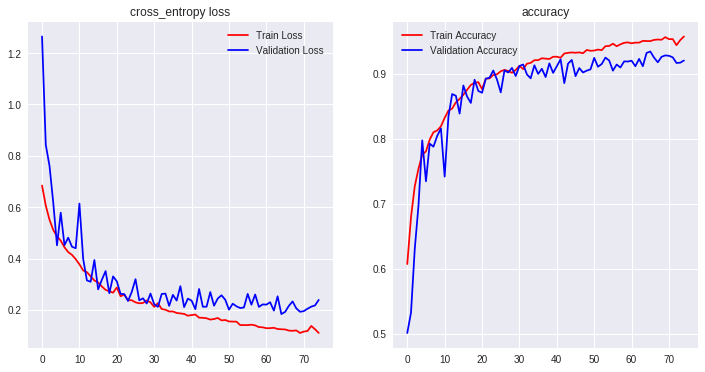

In [29]:
#plot function used from the keras mnist hw
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def plot_loss_accuracy(trained_model):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(trained_model.history["loss"],'r-x', label="Train Loss")
    ax.plot(trained_model.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(trained_model.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(trained_model.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(trained_model)

In [30]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test1.zip to test1.zip
User uploaded file "test1.zip" with length 284479986 bytes


In [0]:
import zipfile
zip_ref = zipfile.ZipFile('test1.zip', 'r')
zip_ref.extractall()
zip_ref.close()

cat


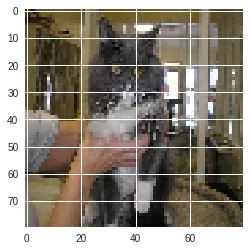

cat


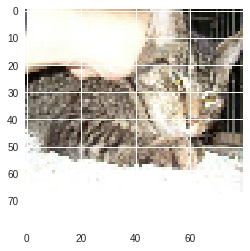

dog


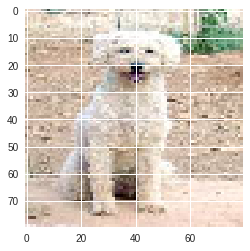

cat


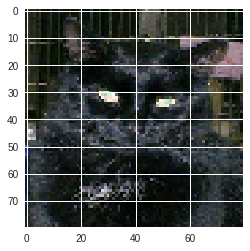

dog


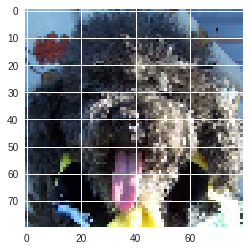

cat


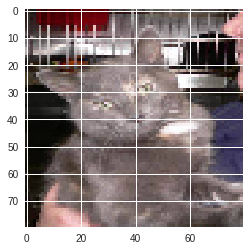

dog


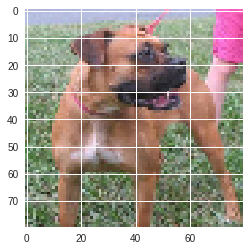

cat


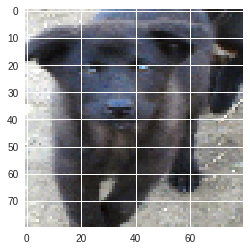

cat


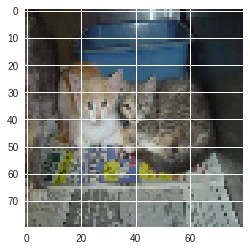

cat


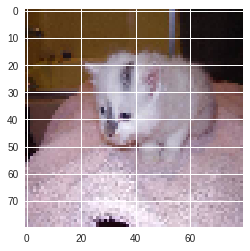

In [55]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

list_of_imgs = []
img_dir = "test1"
for img in os.listdir(img_dir):
    #load image
    img_name = os.path.join(img_dir, img)
    if not img.endswith(".jpg"):
        continue
    img = image.load_img(img_name, target_size=(80, 80))
    test_image = image.img_to_array(img) / 255
    
    #predict
    x = model.predict(np.array([test_image]))
    if(x[0][0] < 0.5):
      print(x[0][0])
      print("cat")
    else:
      print(x[0][0])
      print("dog")
   
    plt.imshow(img)
    plt.show(img)